In [1]:
# Compute the committor for LJ7 using FEM
import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files
from distmesh import *
from FEM_TPT import *

beta = 7

In [2]:
def read_FEdata_files(beta):
    fname = "Data/LJ7free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ7free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix


def read_Mdata_files(entry,beta):
    fname = "Data/LJ7_MargotCV_2D_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ7_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix
    
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y
    
def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

#     for i in range(1,4):
#         for j in range(4):
#             grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

#     for i in range(4):
#         for j in range(1,4):
#             grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
#     grad_x = grad_x/dx
#     grad_y = grad_y/dy
    
    return val #,grad_x,grad_y

In [3]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)

129
129
4.8150613961e-02
6.2338532973e-02
 -4.2840838723e-01
5.7348701998e+00
 -2.7215345455e+00
5.2577976751e+00
129
129
0.048150613961
0.062338532973
-0.42840838723
5.7348701998
-2.7215345455
5.2577976751


In [4]:
FE7, bicubic_matrix7 = read_FEdata_files(beta)
M11_7, M11_bicubic_matrix7 = read_Mdata_files(11,beta)
M12_7, M12_bicubic_matrix7 = read_Mdata_files(12,beta)
M22_7, M22_bicubic_matrix7 = read_Mdata_files(22,beta)


(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [5]:
# visualize the free energy

CV1grid = np.linspace(val1_min,val1_max,N1)
CV2grid = np.linspace(val2_min,val2_max,N2)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

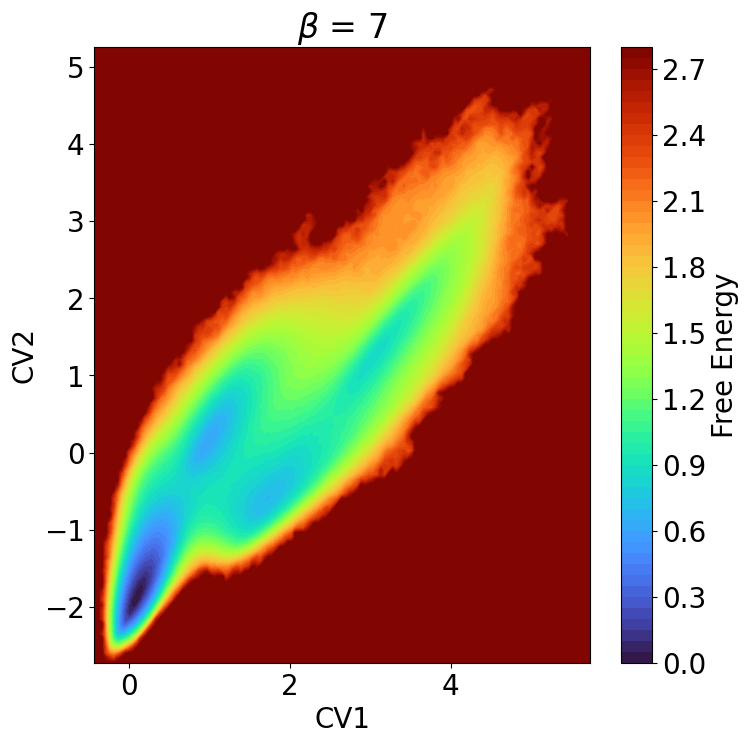

In [6]:
fig_name = "Figures/FE_LJ7_MargotCV2D_beta" + str(beta)+".pdf"
contourf_func(FE7,7,CV1grid,CV2grid,"Free Energy",fig_name)

In [89]:
# Margot's CV
dirCVdata_name = "MLCV_SortD2_data/"
A1 = np.loadtxt(dirCVdata_name+'A1.csv', delimiter=',', dtype=float)
A2 = np.loadtxt(dirCVdata_name+'A2.csv', delimiter=',', dtype=float)
A3 = np.loadtxt(dirCVdata_name+'A3.csv', delimiter=',', dtype=float)
b1 = np.loadtxt(dirCVdata_name+'b1.csv', delimiter=',', dtype=float)
b2 = np.loadtxt(dirCVdata_name+'b2.csv', delimiter=',', dtype=float)
b3 = np.loadtxt(dirCVdata_name+'b3.csv', delimiter=',', dtype=float)

def myELU(x):
    zz = np.zeros_like(x)
    return np.maximum(x,zz) + np.minimum(np.exp(x)-1.0,zz)

def sortdist2(xy):
    Na = 7 # 21 = 7*6/2
    d2 = np.zeros((21,))
    count = 0
    for j in range(1,Na):
        for k in range(j):
            d2[count] = (xy[j] - xy[k])**2 + (xy[j+Na] - xy[k+Na])**2
            count = count + 1
    return np.sort(d2)        
            
def MargotCV(d2):
    w1 = myELU(np.matmul(A1,d2) + b1)
    w2 = myELU(np.matmul(A2,w1) + b2)
    w3 = np.matmul(A3,w2) + b3
    return w3


In [8]:
# load the list of minima and saddles of LJ7 in 2D
XYlist = np.loadtxt('Data/XYlist_min_sad.csv', delimiter=',', dtype=float)
Nlist = np.size(XYlist,axis = 0)
CVlist = np.zeros((Nlist,2))
for j in range(Nlist):
    d2 = sortdist2(XYlist[j,:])
    cv = MargotCV(d2)
    CVlist[j,0] = cv[0]
    CVlist[j,1] = cv[1]


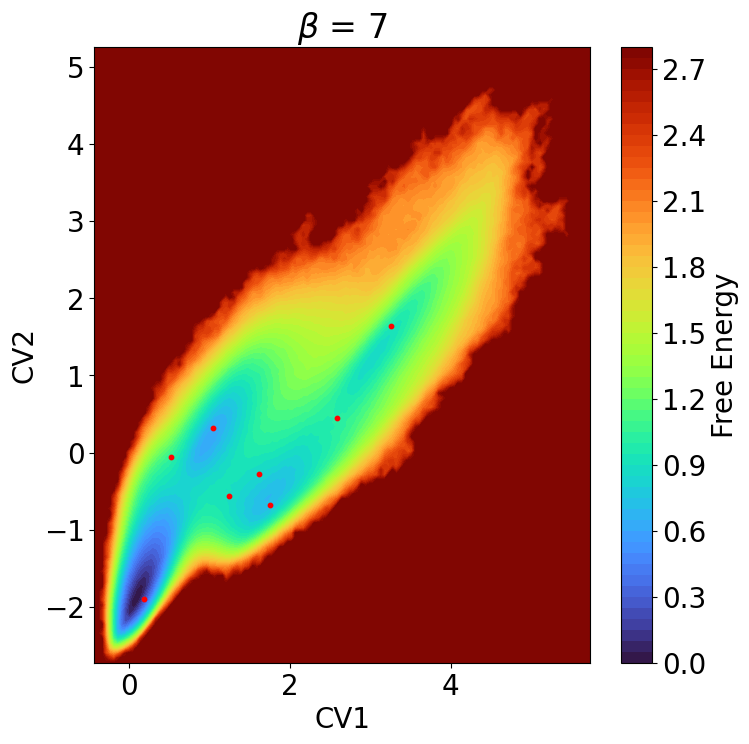

In [9]:

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,FE7, levels=60, cmap='turbo')

cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()
plt.scatter(CVlist[:,0],CVlist[:,1],s = 10, c = 'red')

#axes.set_aspect(1)
fig_name = "Figures/FE_LJ7_MargotCV2D_confs_beta" + str(beta)+".pdf"
plt.savefig(fig_name)

1
FEmax =  2.7878
7
size(Abdry) =  (170, 2)
size(Obdry) =  (1297, 2)
size(Bbdry) =  (232, 2)
x0 =  3.2645557820717492  y0 =  1.6418604504528078
r0 =  1.0083488659414548  r1 =  0.4
vec0 =  0.6508224658272086 0.7592299506569744
vec1 =  -0.7592299506569744 0.6508224658272086
0.0008379078604972075


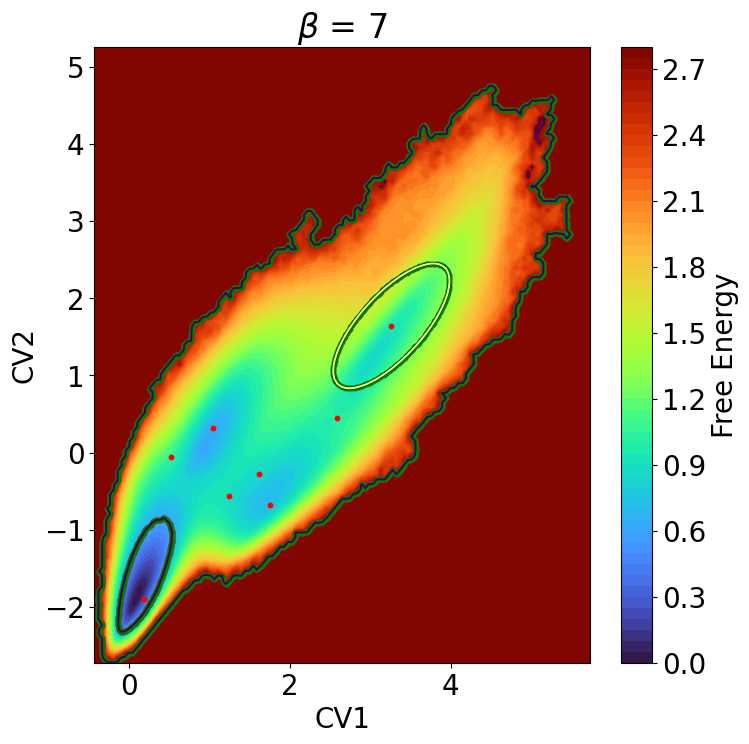

In [92]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,FE7, levels=60, cmap='turbo')

cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()

h = 0.02 # reparametrization scale parameter

feA = 0.6
#feB = 1.1
cA = plt.contour(CV1grid,CV2grid,FE7, [feA])

level_set = cA.allsegs[0]
print(len(level_set))
Abdry = level_set[0]
Abdry = reparametrization(Abdry,h)
plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'red')
plt.scatter(CVlist[:,0],CVlist[:,1],s = 10, c = 'red')

FEmax = np.max(FE7)
print("FEmax = ",FEmax)

Odry = plt.contour(CV1grid,CV2grid,FE7, [FEmax*0.99])
level_set = Odry.allsegs[0]
print(len(level_set))
Obdry = level_set[0]
Obdry = reparametrization(Obdry,h)
plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'red')

plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'green')
plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'green')

print("size(Abdry) = ", np.shape(Abdry))
print("size(Obdry) = ", np.shape(Obdry))

Nt = 50
jc = 3
jaux = 6

t = np.linspace(0,2*np.pi,Nt)
vec0 = CVlist[jc,:]-CVlist[jaux,:]
norm0 = np.linalg.norm(vec0)
vec0 = vec0/norm0
vec1 = np.array([-vec0[1],vec0[0]]);
r0 = norm0*0.4
r1 = 0.4
x = CVlist[jc,0] + (r0*vec0[0]*np.cos(t) + vec1[0]*r1*np.sin(t))
y = CVlist[jc,1] + (r0*vec0[1]*np.cos(t) + vec1[1]*r1*np.sin(t))
plt.plot(x,y,color = "black",linewidth = 2)

bb = np.concatenate((np.reshape(x,(Nt,1)),np.reshape(y,(Nt,1))),axis = 1)
Bbdry = reparametrization(bb,h)
plt.scatter(Bbdry[:,0],Bbdry[:,1],s = 10, c = 'green')
print("size(Bbdry) = ", np.shape(Bbdry))

print("x0 = ",CVlist[jc,0]," y0 = ",CVlist[jc,1])
print("r0 = ", r0, " r1 = ", r1)
print("vec0 = ", vec0[0],vec0[1])
print("vec1 = ",vec1[0],vec1[1])

x0 = CVlist[jc,0];
y0 = CVlist[jc,1];
vx = vec0[0]
vy = vec0[1]

def Bellipse(x,y):
    aux1 = ((x-x0)*vx + (y-y0)*vy)/r0
    aux2 = ((x-x0)*vy - (y-y0)*vx)/r1
    return aux1*aux1 + aux2*aux2
    

cv1mesh,cv2mesh = np.meshgrid(CV1grid,CV2grid)
Bfunc = Bellipse(cv1mesh,cv2mesh)
print(np.min(Bfunc))
plt.contour(cv1mesh,cv2mesh,Bfunc,[1.0],cmap='Wistia')

In [12]:
dirname = "FEMdataBETA"+str(beta)+"/"
Abdry.tofile(dirname +'Abdry.csv', sep = ',')
Bbdry.tofile(dirname +'Bbdry.csv', sep = ',')
Obdry.tofile(dirname +'Obdry.csv', sep = ',')

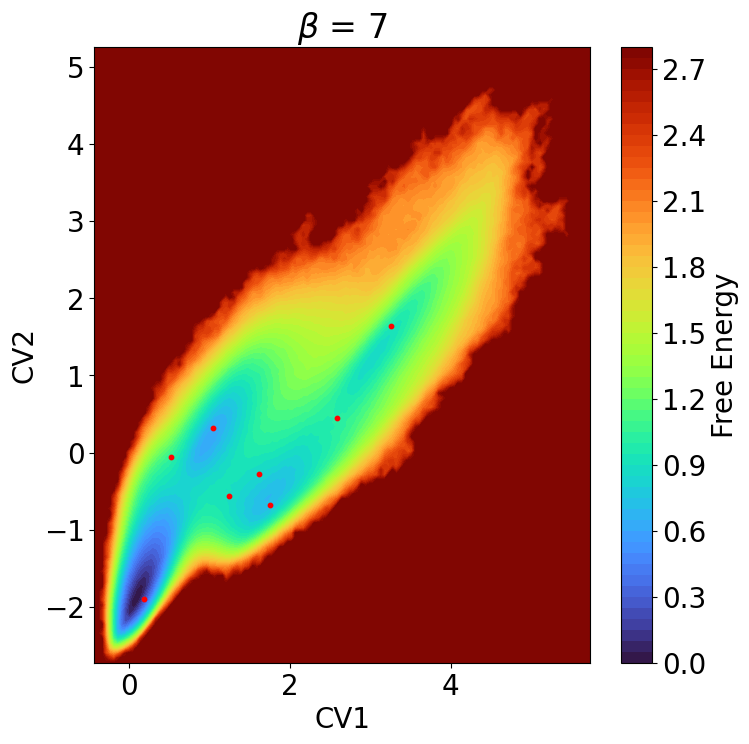

In [13]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,FE7, levels=60, cmap='turbo')

cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()
plt.scatter(CVlist[:,0],CVlist[:,1],s = 10, c = 'red')

#axes.set_aspect(1)
fig_name = "Figures/FE_LJ7_MargotCV2D_confs_beta" + str(beta)+".pdf"
plt.savefig(fig_name)

In [14]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    scale = 0.002
    N2,N1 = np.shape(func)
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
    plt.savefig(fig_name)

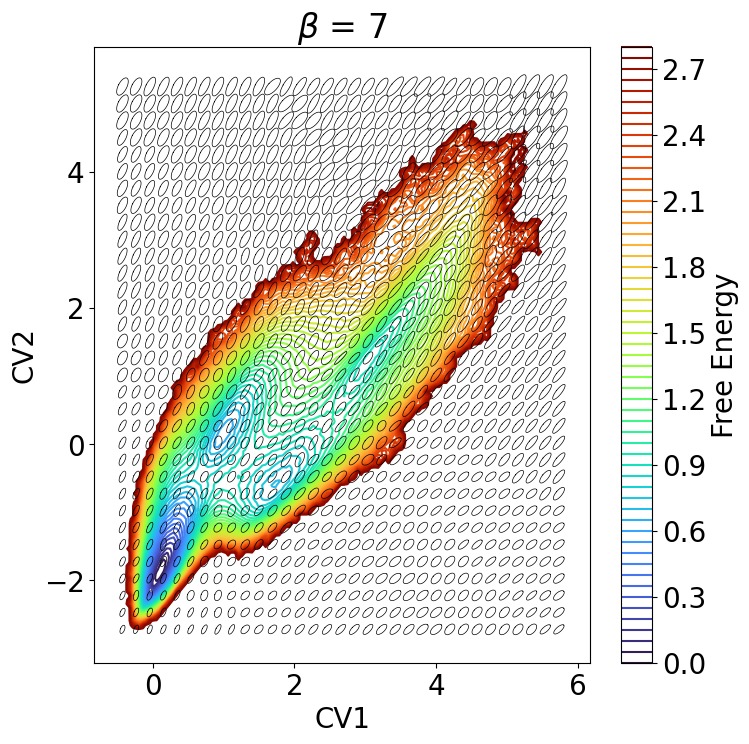

In [15]:
step = 4

fig_name = "Figures/LJ7_FE_DiffMatr_MargotCV_2D_beta7.pdf"
visualize_diffusion_matrix(FE7,M11_7,M12_7,M22_7,beta,step,CV1grid,CV2grid,"Free Energy",fig_name)

OmegaAB: Npts =  22399  Ntri =  41406
A: NptsA =  1766  NtriA =  3192
B: NptsB =  2920  NtriB =  5376


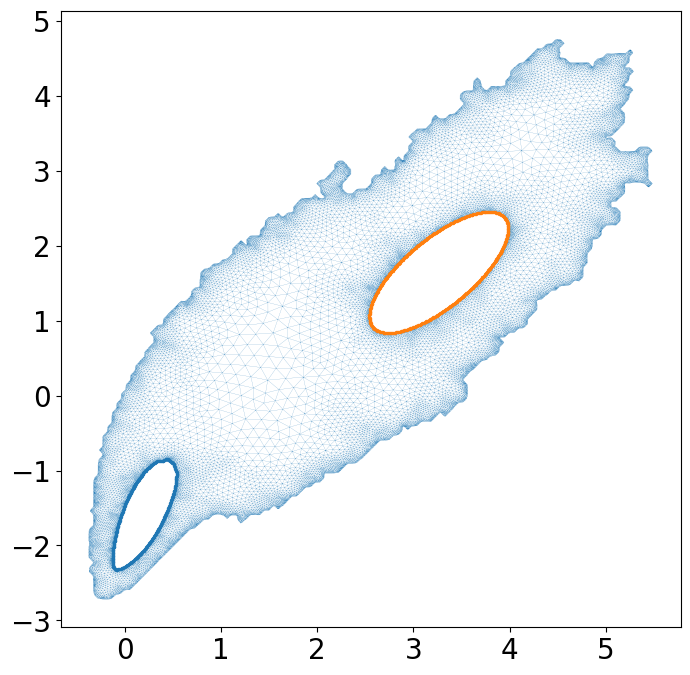

In [16]:
# The triangulation is done using Darren Engwirda's triangulation package mesh2D
# https://github.com/dengwirda/mesh2d?tab=readme-ov-file

dirname = "FEMdataBETA"+str(beta)+"/"

# Read the triangulation files
Aind = np.loadtxt(dirname +"Abdry_idx.csv", delimiter=',', dtype=np.int64)
Bind = np.loadtxt(dirname +"Bbdry_idx.csv", delimiter=',', dtype=np.int64)
pts = np.loadtxt(dirname +"pts.csv", delimiter=',', dtype=float)
ptsA = np.loadtxt(dirname +"ptsA.csv", delimiter=',', dtype=float)
ptsB = np.loadtxt(dirname +"ptsB.csv", delimiter=',', dtype=float)
tri = np.loadtxt(dirname +"tri.csv", delimiter=',', dtype=np.int64)
triA = np.loadtxt(dirname +"triA.csv", delimiter=',', dtype=np.int64)
triB = np.loadtxt(dirname +"triB.csv", delimiter=',', dtype=np.int64)

Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
NptsA = np.size(ptsA,axis = 0)
NtriA = np.size(triA,axis = 0)
NptsB = np.size(ptsB,axis = 0)
NtriB = np.size(triB,axis = 0)

print("OmegaAB: Npts = ",Npts," Ntri = ",Ntri)
print("A: NptsA = ",NptsA," NtriA = ",NtriA)
print("B: NptsB = ",NptsB," NtriB = ",NtriB)

plt.figure(figsize=(8,8))
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
# plt.savefig('LJ72D_trimesh_ABellipses.pdf')


In [17]:
# ise the bicubic interpolation to interpolate the free energy and the diffusion matrix 
# to the nodes of the triangulated mesh

# FE7, bicubic_matrix7 = read_FEdata_files(beta)
# M11_7, M11_bicubic_matrix7 = read_Mdata_files(11,beta)
# M12_7, M12_bicubic_matrix7 = read_Mdata_files(12,beta)
# M22_7, M22_bicubic_matrix7 = read_Mdata_files(22,beta)

Fpts = np.zeros((Npts,))
M11pts = np.zeros((Npts,))
M12pts = np.zeros((Npts,))
M22pts = np.zeros((Npts,))
FptsA = np.zeros((NptsA,))
FptsB = np.zeros((NptsB,))

for j in range(Npts):
    Fpts[j] = bicubic_interpolation(bicubic_matrix7,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M11pts[j] = bicubic_interpolation(M11_bicubic_matrix7,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M12pts[j] = bicubic_interpolation(M12_bicubic_matrix7,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M22pts[j] = bicubic_interpolation(M22_bicubic_matrix7,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    
for j in range(NptsA):
    FptsA[j] = bicubic_interpolation(bicubic_matrix7,CV1grid,CV2grid,h1,h2,ptsA[j,0],ptsA[j,1])

for j in range(NptsB):
    FptsB[j] = bicubic_interpolation(bicubic_matrix7,CV1grid,CV2grid,h1,h2,ptsB[j,0],ptsB[j,1])

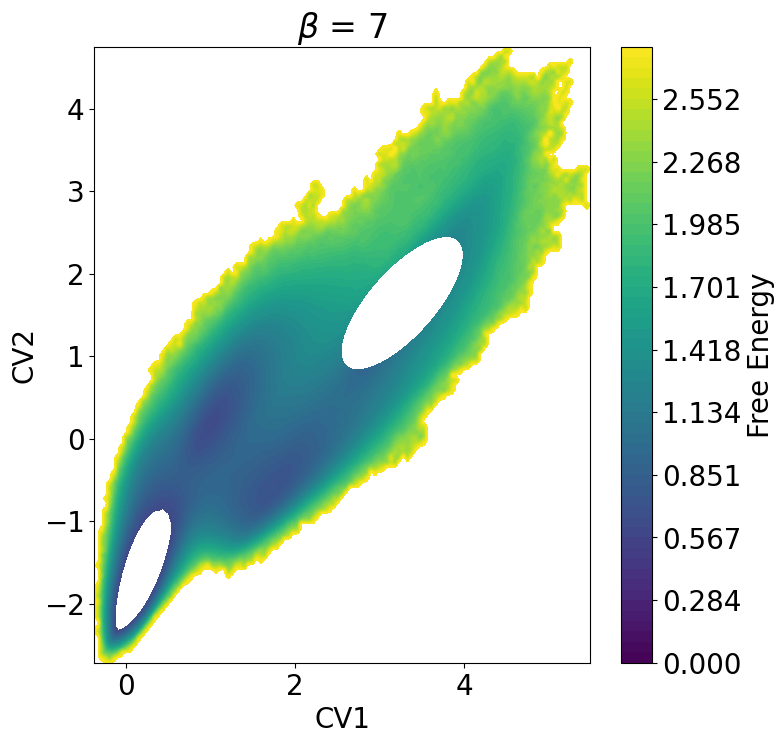

In [18]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.linspace(np.min(FE7),np.max(FE7),60) )
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


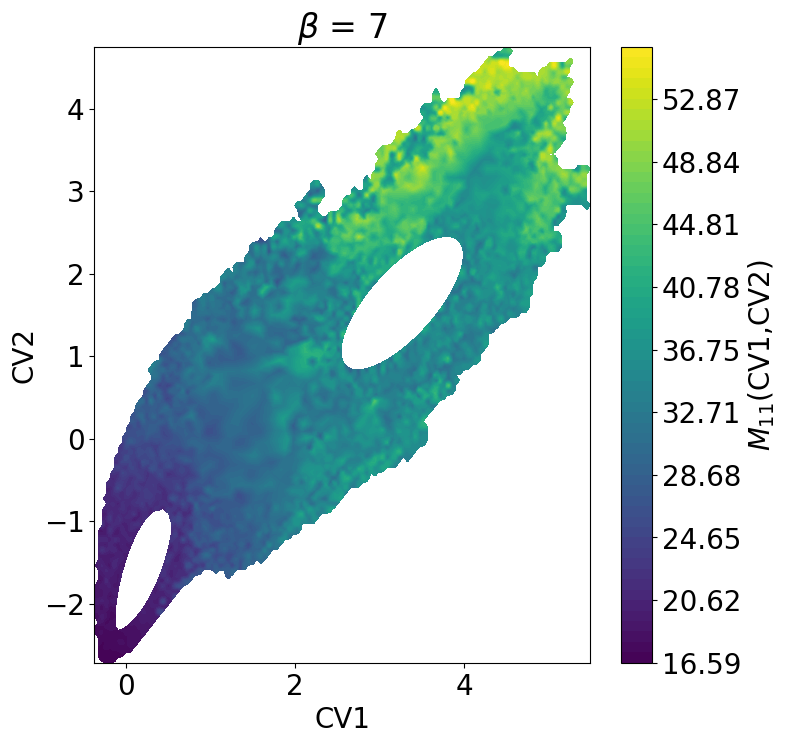

In [19]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M11pts,np.linspace(np.min(M11_7),np.max(M11_7),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{11}$(CV1,CV2)', size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


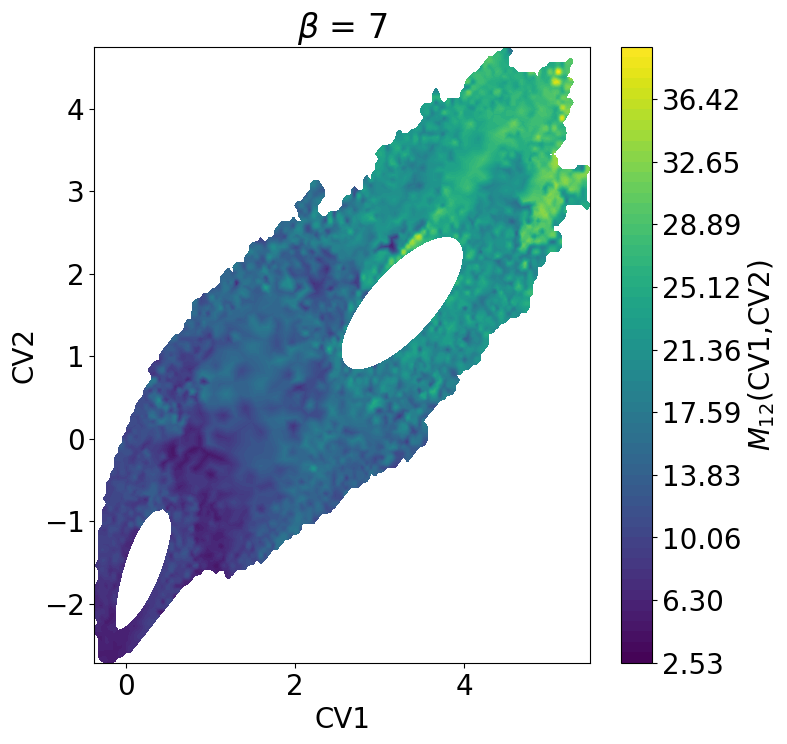

In [20]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M12pts,np.linspace(np.min(M12_7),np.max(M12_7),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{12}$(CV1,CV2)', size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


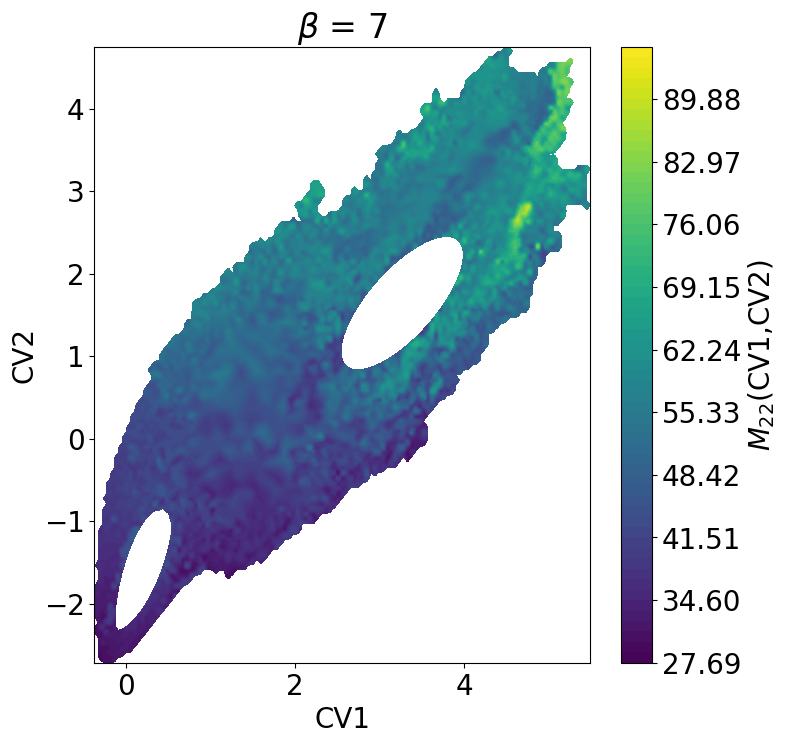

In [21]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M22pts,np.linspace(np.min(M22_7),np.max(M22_7),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{22}$(CV1,CV2)', size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


In [22]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)


In [23]:
print(np.min(q))
print(np.max(q))

0.0
1.0


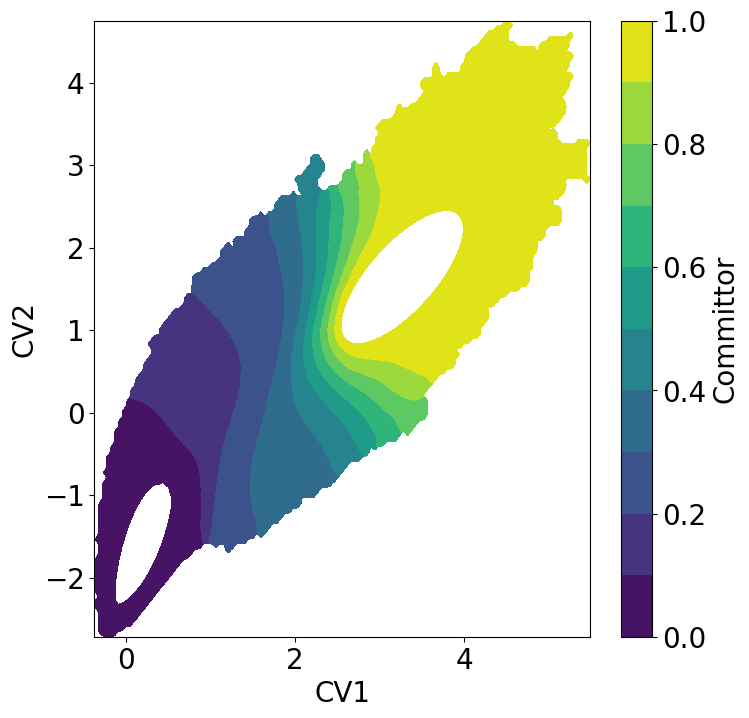

In [24]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
plt.colorbar(label="Committor", orientation="vertical")
plt.xlabel("CV1")
plt.ylabel("CV2")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
# plt.savefig('LJ72D_committor_MargotCV_2D.pdf')

In [25]:
def FEfun(v):
    v = np.squeeze(v)
    return bicubic_interpolation(bicubic_matrix7,CV1grid,CV2grid,h1,h2,v[0],v[1])

Z = invariant_pdf(pts,tri,ptsA,triA,ptsB,triB,FEfun,beta)
print("Z = ",Z)

Z =  0.10684716839569995


In [26]:
# find the reactive current and the transition rate
Rcurrent, Rrate = reactive_current_and_transition_rate_var_diffusion_matrix(pts,tri,Fpts,M11pts,M12pts,M22pts,beta,q,Z)
print("Transition rate = ",Rrate)

Transition rate =  0.029110187445042568


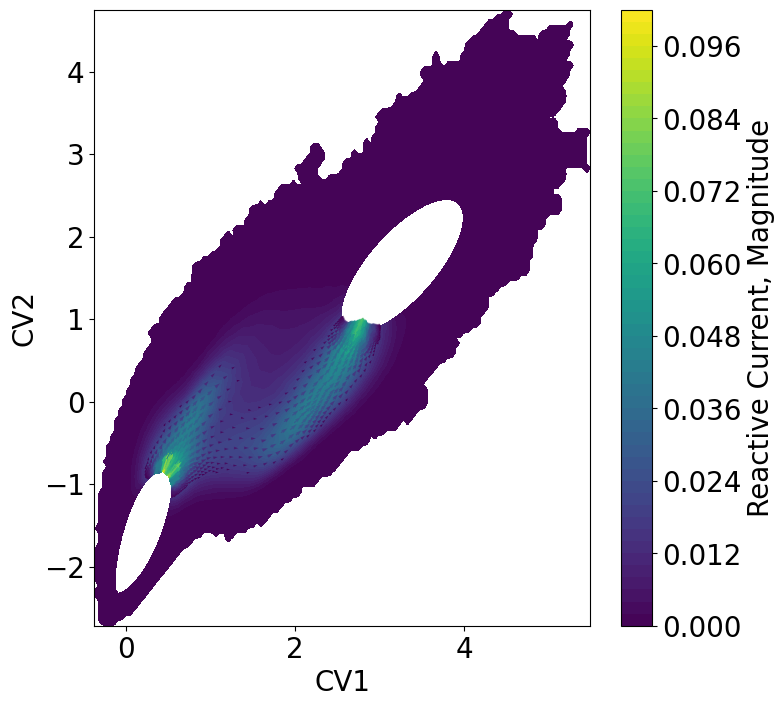

In [27]:
Acurrent = np.sqrt(np.sum(Rcurrent**2,axis = 1))
ind = np.argwhere(Acurrent > 0.015)
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Acurrent,levels = 60)
plt.colorbar(label="Reactive Current, Magnitude", orientation="vertical")
plt.quiver(pts[ind,0], pts[ind,1], Rcurrent[ind,0], Rcurrent[ind,1], [Acurrent[ind]])
plt.xlabel("CV1")
plt.ylabel("CV2")

# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
# plt.savefig('LJ72D_committor_MargotCV_2D.pdf')

In [28]:
# find the probability that a trajectory is reactive at any randomly picked time t
# \rho_{AB} = \int_{\Omega_{AB}}\mu*qplus*qminus*dx
prob_reactive = probability_reactive(pts,tri,FEfun,beta,q,Z)
print("Probability that a trajectory is reactive at a randomly picked time: ",prob_reactive)

Probability that a trajectory is reactive at a randomly picked time:  0.014212865185084151


In [29]:
# \rho_{A} = \int_{\Omega}\mu*qminus*dx
prob_lastA = probability_last_A(pts,tri,ptsA,triA,FEfun,beta,q,Z)
print("Probability that a trajectory last visited A: ",prob_lastA)

Probability that a trajectory last visited A:  0.9705145936368614


In [30]:
# \rho_{A} = \int_{\Omega}\mu*qminus*dx
prob_lastB = 1 - prob_lastA
print("Probability that a trajectory last visited B: ",prob_lastB)

Probability that a trajectory last visited B:  0.029485406363138567


In [31]:
# Escape rates
kA = Rrate/prob_lastA
kB = Rrate/prob_lastB
print("Escape rates: kA = ",kA," kB = ",kB)

Escape rates: kA =  0.029994590123530653  kB =  0.9872744193017098


In [32]:
# plt.rcParams.update({'font.size': 20})
# plt.figure(figsize=(8,8))
# plt.contourf(CV1grid,CV2grid,FE7, levels=60, cmap='turbo')

# cbar = plt.colorbar()
# cbar.set_label("Free Energy", size=20)
# plt.xlabel("CV1")
# plt.ylabel("CV2")
# plt.title(r'$\beta$' + ' = ' + str(beta))
# axes=plt.gca()
# plt.scatter(mepCV12[:,0],mepCV12[:,1],c = lxy,s = 15,cmap = 'binary')
# plt.savefig("MEPinMargotCVs.pdf")

In [33]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)


Text(0, 0.5, 'CV2')

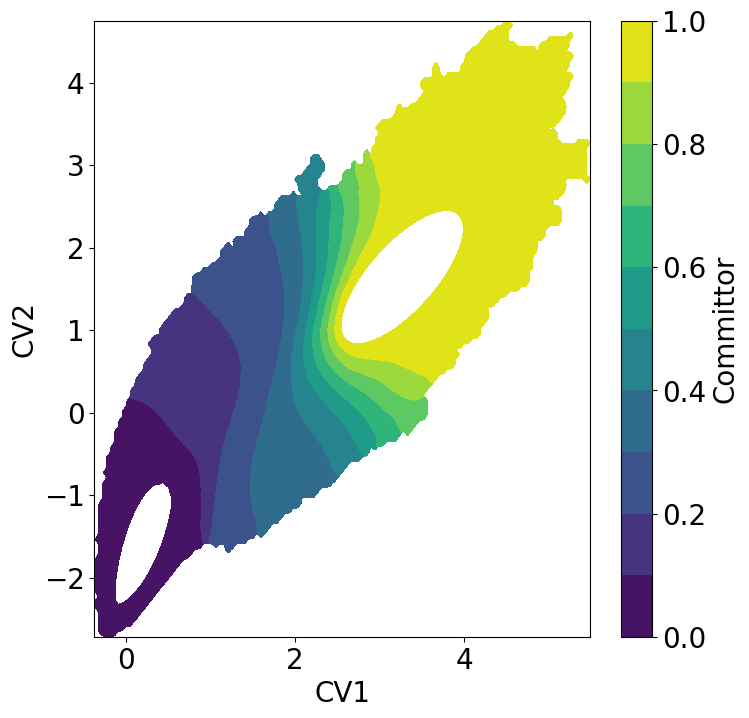

In [34]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
plt.colorbar(label="Committor", orientation="vertical")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
plt.xlabel("CV1")
plt.ylabel("CV2")
# plt.savefig('LJ72D_committor_MargotCV_2D.pdf')

In [35]:
Z = invariant_pdf(pts,tri,ptsA,triA,ptsB,triB,FEfun,beta)
print("Z = ",Z)

Z =  0.10684716839569995


In [36]:
# find the reactive current and the transition rate
Rcurrent, Rrate = reactive_current_and_transition_rate_var_diffusion_matrix(pts,tri,Fpts,M11pts,M12pts,M22pts,beta,q,Z)
print("Transition rate = ",Rrate)

Transition rate =  0.029110187445042568


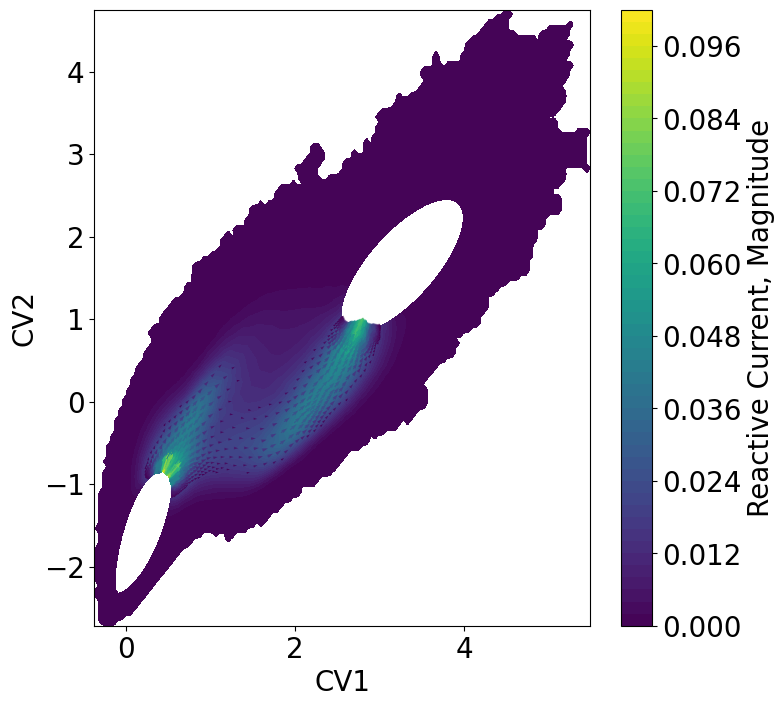

In [37]:
Acurrent = np.sqrt(np.sum(Rcurrent**2,axis = 1))
ind = np.argwhere(Acurrent > 0.015)
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Acurrent,levels = 60)
plt.colorbar(label="Reactive Current, Magnitude", orientation="vertical")
plt.quiver(pts[ind,0], pts[ind,1], Rcurrent[ind,0], Rcurrent[ind,1], [Acurrent[ind]])
plt.xlabel("CV1")
plt.ylabel("CV2")

# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
# plt.savefig('LJ72D_committor_MargotCV_2D.pdf')

In [38]:
# find the probability that a trajectory is reactive at any randomly picked time t
# \rho_{AB} = \int_{\Omega_{AB}}\mu*qplus*qminus*dx
prob_reactive = probability_reactive(pts,tri,FEfun,beta,q,Z)
print("Probability that a trajectory is reactive at a randomly picked time: ",prob_reactive)

Probability that a trajectory is reactive at a randomly picked time:  0.014212865185084151


In [39]:
# \rho_{A} = \int_{\Omega}\mu*qminus*dx
prob_lastA = probability_last_A(pts,tri,ptsA,triA,FEfun,beta,q,Z)
print("Probability that a trajectory last visited A: ",prob_lastA)

Probability that a trajectory last visited A:  0.9705145936368614


In [40]:
# \rho_{A} = \int_{\Omega}\mu*qminus*dx
prob_lastB = 1 - prob_lastA
print("Probability that a trajectory last visited B: ",prob_lastB)

Probability that a trajectory last visited B:  0.029485406363138567


In [41]:
# Escape rates
kA = Rrate/prob_lastA
kB = Rrate/prob_lastB
print("Escape rates: kA = ",kA," kB = ",kB)

Escape rates: kA =  0.029994590123530653  kB =  0.9872744193017098
